# Рабочая тетрадь 7

#### Пример 1.1.1
Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.

Начнем с описания объектов класса:

In [ ]:
# класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self, N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)

    # метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res

    # пороговая ф-я активации персептрона
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1

    # обучение на одном примере
    def learn(self, la, x, y):
        # обучаем только когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]

    # обучение по всем данным T - кортеж примеров
    def learning(self, la, T):
        # цикл обучения
        for n in range(100):
            # обучение по всему набору примеров
            for t in T:
                self.learn(la, t[0], t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится и работает наш персептрон.

In [ ]:
# создаем класс двумерного персептрона
perceptron = Perceptron(2)
la = 0.1  # константа обучения
# создаем примеры
T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])
perceptron.learning(la, T)  # обучение персептрона
print(perceptron.w)  # печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

#### Пример 1.1.2
Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

In [ ]:
import numpy as np


def sigmoid(x):
    # ф-я активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4  # c = 4
n = Neuron(weights, bias)
x = np.array([2, 3])  # x = 2, y = 3
print(n.feedforward(x))  # 0.9990889488055994

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов. Пример несложной нейронной сети

# КАРТИНКА
где:

+ x_1,x_2 — входной слой;
+ h_1,h_2 — скрытый слой с двумя нейронами;
+ o_1 — выходной слой.

Например. Представим, что нейроны из графика выше имеют веса [0,1]. Пороговое значение (b) у обоих нейронов равно 0 и они имеют идентичную сигмоиду.

При входных данных x=[2,3] получим:

h_1  = h_2  = f(wx+b) = f((0 * 2) + (1 * 3) +0) = f(3) = 0.95.

o_1  = f(w*[h_1,h_2] +b) = f((0h_1) + (1h_2) +0) = f(0.95) = 0.72.

Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.


In [ ]:
import numpy as np


class OurNeuralNetwork:
    '''
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (o1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1]
        - b = 0
    '''

    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы для o1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1


network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))  # 0.7216325609518421


0.7216325609518421


Класс нейронной сети из теоретического материала:

In [ ]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # применение правила цепи для нахождения производной потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output),
                                                  self.weights2.T) * sigmoid_derivative(self.layer1)))

        # обновление веса производной (наклона) ф-ии потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

#### Задание

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:

	- три входа (x_1,x_2,x_3 );
	- три нейрона в скрытых слоях (h_1,h_2,h_3);
	- выход (o_1).

Нейроны имеют идентичные веса и пороги:

    - w = [0.5,0.5,0.5]
	- b = 0
Данные нейросети:

	- два входа (x_1,x_2);
	- два нейрона в скрытых слоях (h_1,h_2);
	- два выхода (o_1,o_2 ).

Нейроны имеют идентичные веса и пороги:

    - w = [1,0];
    - b = 1.


In [ ]:
# Подготовка: создадим класс персептрона и его обучения
# Ф-я активации - сигмоида

import numpy as np


def sigmoid(x):
    # ф-я активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

In [ ]:
# 1
import numpy as np


class OurNeuralNetwork1:
    '''
    Данные нейросети:
        - три входа
        - три нейрона в скрытых слоях (h1, h2, h3)
        - выход (o1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0.5, 0.5, 0.5]
        - b = 0
    '''

    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0

        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)

        # Входы для o1 - это выходы h1, h2, h3
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1


network = OurNeuralNetwork1()
x = np.array([0, 10, 100])
print(network.feedforward(x))

0.8175744761936437


In [ ]:
# 2
import numpy as np


class OurNeuralNetwork2:
    '''
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - два выхода (o1, o2)
    Нейроны имеют идентичные веса и пороги:
        - w = [1, 0]
        - b = 1
    '''

    def __init__(self):
        weights = np.array([1, 0])
        bias = 1

        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)

        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        # Вход для o1 - это выход h1, h2
        # Вход для o2 - это выход h1, h2
        # o1 = o2

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2


network = OurNeuralNetwork2()
x = np.array([0, 10])
print(network.feedforward(x))

(0.8495477739862124, 0.8495477739862124)


### Задание
Реализуйте классы нейронных сетей с использованием других функций активации.

# КАРТИНКА

In [ ]:
import numpy as np


# Ф-ии активаций и их производные

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


def tanh(x):
    return np.tanh(x)


def tanh_derivative(x):
    return 1 - tanh(x) ** 2


def ReLU(x):
    return max(0, x)


def ReLU_derivative(x):
    if x > 0:
        return 1
    if x < 0:
        return 0


# Классы нейронов для каждой ф-ии
class Neuron_sigmoid:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


class Neuron_tanh:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)


class Neuron_ReLU:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

output:
 [[0.00386513]
 [0.99750285]
 [0.00205696]
 [0.99747581]]
last loss:  3.177760100265001e-05
min loss:  3.177760100265001e-05


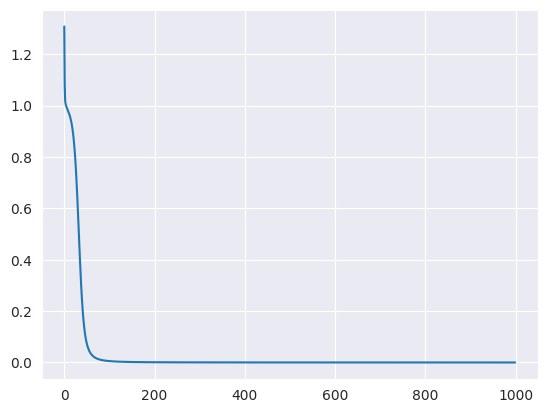

In [ ]:
import matplotlib.pyplot as plt


# расчёт потерь
def loss_calc(y_hat, y):
    return ((y_hat - y) ** 2).sum()


loss_values = []


class NeuralNetwork_sigmoid:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # применение правила цепи для нахождения производной потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output),
                                                  self.weights2.T) * sigmoid_derivative(self.layer1)))

        # обновление веса производной (наклона) ф-ии потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [0], [1]])

net_sigmoid = NeuralNetwork_sigmoid(X, y)
for i in range(1000):
    net_sigmoid.feedforward()
    net_sigmoid.backprop()
    loss_values.append(loss_calc(net_sigmoid.output, y))
print("output:\n", net_sigmoid.output)
print("last loss: ", loss_values[-1])
print("min loss: ", min(loss_values))
plt.plot(loss_values)

output:
 [[ 0.        ]
 [ 0.96982025]
 [-0.23254961]
 [ 0.96982025]]
last loss:  0.05590095466658452
min loss:  0.04157564390273274


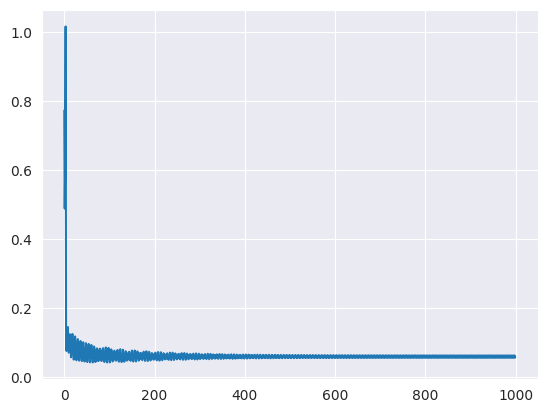

In [ ]:
import matplotlib.pyplot as plt


# расчёт потерь
def loss_calc(y_hat, y):
    return ((y_hat - y) ** 2).sum()


loss_values = []


class NeuralNetwork_tanh:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1))
        self.output = tanh(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # применение правила цепи для нахождения производной потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * tanh_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * tanh_derivative(self.output),
                                                  self.weights2.T) * tanh_derivative(self.layer1)))

        # обновление веса производной (наклона) ф-ии потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [0], [1]])

net_tanh = NeuralNetwork_tanh(X, y)
for i in range(1000):
    net_tanh.feedforward()
    net_tanh.backprop()
    loss_values.append(loss_calc(net_tanh.output, y))
print("output:\n", net_tanh.output)
print("last loss: ", loss_values[-1])
print("min loss: ", min(loss_values))
plt.plot(loss_values)

In [ ]:
import matplotlib.pyplot as plt


# расчёт потерь
def loss_calc(y_hat, y):
    return ((y_hat - y) ** 2).sum()


loss_values = []


class NeuralNetwork_ReLU:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self):
        self.layer1 = ReLU(np.dot(self.input, self.weights1))
        self.output = ReLU(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # применение правила цепи для нахождения производной потерь по весу2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * ReLU_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * ReLU_derivative(self.output),
                                                  self.weights2.T) * ReLU_derivative(self.layer1)))

        # обновление веса производной (наклона) ф-ии потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [0], [1]])

net_ReLU = NeuralNetwork_ReLU(X, y)
for i in range(1000):
    net_ReLU.feedforward()
    net_ReLU.backprop()
    loss_values.append(loss_calc(net_ReLU.output, y))
print("output:\n", net_ReLU.output)
print("last loss: ", loss_values[-1])
print("min loss: ", min(loss_values))
plt.plot(loss_values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

## MLPClassifier
Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр, который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор данных о жилье в Бостоне, который содержит информацию о различных свойствах дома, таких как среднее количество комнат, уровень преступности на душу населения в городе и т. д. Мы будем использовать его для задач регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить их, вызвав методы load_digits() и load_boston().


In [ ]:
from sklearn.datasets import load_digits, load_boston

# warnings.warn(msg, category=FutureWarning)

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print("Dataset Sizes: ", X_digits.shape, Y_digits.shape)
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print("Dataset Sizes: ", X_boston.shape, Y_boston.shape)


Классификация

MLPClassifier — это класс, доступный как часть модуля neuro_network sklearn для выполнения задач классификации с использованием многослойного персептрона.
Как обычно разделим набор данных на две части:

	данные обучения, которые будут использоваться для модели обучения;
	тестовые данные, по которым будет проверяться точность обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам разделить данные на два набора: 80% для обучения и 20% для тестирования. Мы также используем seed(random_state=123) с train_test_split, чтобы мы всегда получали одно и то же разделение и могли сравнивать и воспроизволить результаты в будущем.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.8,
                                                    test_size=0.2, stratify=Y_digits, random_state=123)
print("Train/Test Sizes:  ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Для начала натренируем модель MLPClassifier с параметрами по умолчанию для тренировочных данных.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

In [ ]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

# Метод Score для оценки точности моделей классификации
print("Test Accuracy: %.3f" % mlp_classifier.score(X_test, Y_test))
print("Training Accuracy: %.3f" % mlp_classifier.score(X_train, Y_train))

Cоздадим метод plot_confusion_matrix(), который принимает исходные и предсказанные метки данных по модели. Затем он строит матрицу путаницы, используя matplotlib.

In [ ]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)

    fig = plt.figure(figsize=(6, 6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks = (range(10), range(10))
    plt.xticks = (range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color="tab:red")


plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier, которые могут предоставить значимую информацию после обучения модели.

-	loss_ — возвращает убыток после завершения процесса обучения.
-	coefs_ — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i.
-	intercepts_ — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i.
-	n_iter_ — количество итераций, для которых выполнялась оценка.
-	out_activation_ — возвращает имя функции активации выходного слоя.
-	out_activation_ — возвращает имя функции активации выходного слоя.


In [ ]:
print("Loss: ", mlp_classifier.loss_)
print("Number of Coefs: ", len(mlp_classifier.coefs_))
print("Number of Intercepts: ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

### MLPRegressor

MLPRegressor — это класс, доступный как часть библиотеки neuro_network sklearn для выполнения задач регрессии с использованием многослойного персептрона. Также разделим набор данных на две части:

-	данные обучения (80%), которые будут использоваться для модели обучения;
-	тестовые данные (20%), по которым будет проверяться точность обученной модели.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.8,
                                                    test_size=0.2, random_state=123)
print("Train/Test Sizes:  ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

In [ ]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# Метод Score оценивает точность моделей классификации
print("Test R^2 Score: %.3f" % mlp_regressor.score(X_test, Y_test))
print("Training R^2 Score: %.3f" % mlp_regressor.score(X_train, Y_train))

In [ ]:
print("Loss: ", mlp_regressor.loss_)
print("Number of Coefs: ", len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

In [ ]:
print("Number of Iterations for Which Estimator Ran:", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Fuction:", mlp_regressor.out_activation_)

### Задание
Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv


In [ ]:
# Classification
import pandas as pd

data = pd.read_csv(
    'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
data.head()

In [ ]:
X = data.iloc[:, 0:4]
y = data.iloc[:, 4]
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=123)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123, max_iter=15000)  # без параметра max_iter - ConvergenceWarning
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15].values)

# Метод Score для оценки точности моделей классификации
print("Test Accuracy: %.3f" % mlp_classifier.score(X_test, Y_test))
print("Training Accuracy: %.3f" % mlp_classifier.score(X_train, Y_train))

In [ ]:
# Regression
import pandas as pd

data = pd.read_csv(
    'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
data.head()

In [ ]:
X = data["YearsExperience"].values.reshape(-1, 1)
y = data['Salary'].values
y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=123)
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123, max_iter=100000)  # без параметра max_iter - ConvergenceWarning
mlp_regressor.fit(X_train, Y_train)

Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# Метод Score оценивает точность моделей классификации
print("Test R^2 Score: %.3f" % mlp_regressor.score(X_test, Y_test))
print("Training R^2 Score: %.3f" % mlp_regressor.score(X_train, Y_train))

# С модифицированным параметром max_iter метрика R^2 стала положительной
# По полученным значениям с при дефолтном max_iter=200 видно, что
# модель даёт неадекватные ответы

# Было до изменения max_iter:

# [20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
# [ 54445. 121872.  56642. 116969.  64445. 112635.]
# Test R^2 Score: -8.796
# Training R^2 Score: -8.261

# Если R2 < 0 - разработанная модель даёт прогноз даже хуже, чем простое усреднение

In [ ]:
print("Loss: ", mlp_regressor.loss_)
print("Number of Coefs: ", len(mlp_regressor.coefs_))
print("Number of Intercepts: ", len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_regressor.out_activation_)

In [ ]:
data